# Homework 1 - Pandas

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 

## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and/or Homework 2 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [2]:
# import the csv library
import csv
# initialize the top-level array
i=0
with open('movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        i += 1
        if row[0]=='':
            print (row) #Header
        if row[0]=='1':
            print (row) #1st row of the table
print (len(row)) #Number of rows
print (i) #Number of columns

['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
['1', '$', '1971', '121', 'NA', '6.4', '348', '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0']
25
58789


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell - you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 500 votes in your loaded dataset and print the output. (We'll call these movies with more than 500 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 500 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [3]:
# your code goes here
#1.2.1
nom=0
totalrating=0
with open('movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if row[5]!='rating':
            nom +=1
            row[5]=float(row[5])
            totalrating=totalrating+row[5]
print ('Average rating: ',totalrating/nom,' Number of movies: ',nom)
#1.2.2
nomm=0
ttr2=0
with open('movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if row[6]!='votes':
            row[6]=float(row[6])
            if row[6]>500:
                nomm+=1
                row[5]=float(row[5])
                ttr2=ttr2+row[5]
print ('Average rating of movies with more than 500 votes: ',ttr2/nomm,' Number of major movies: ',nomm)
#1.2.3
a={}
with open('movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if row[6]!='votes':
            row[6]=float(row[6])
            if row[6]>500:
                a[float(row[5])]=row[1]
hr=max(a.keys())
print ('Highest rating: ',hr,' Title: ',a[hr])         

Average rating:  5.932850241545932  Number of movies:  58788
Average rating of movies with more than 500 votes:  6.370579126664578  Number of major movies:  6458
Highest rating:  9.1  Title:  Shawshank Redemption, The


**Your Interpretation**: TODO
- Major movies is about 11% the size of all movies
- Yes

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [2]:
# import pandas and numpy
import pandas as pd
import numpy as np
# your code goes here
movies=pd.read_csv('movies.csv')
a, b = movies.shape
print (a) #Number of rows
print (b) #Number of columns
header=movies.axes[1]
print (header)

58788
25
Index(['Unnamed: 0', 'title', 'year', 'length', 'budget', 'rating', 'votes',
       'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa',
       'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance',
       'Short'],
      dtype='object')


In [5]:
# print data types
type(movies["title"])

pandas.core.series.Series

**Your Interpretation**: TODO

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average rating: xxx.xxxx

In [9]:
# your code goes here
totalrating=movies[['rating']].mean()
print (totalrating)

rating    5.93285
dtype: float64


### Task 2.3: Compare the runtime

Measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from part one).

You can use [time.clock()](https://docs.python.org/3/library/time.html) to set timestamps before and after the execution of the code you want to measure, then you simply substract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx

In [11]:
import time
# your code goes here
a1=time.clock()
totalrating=movies[['rating']].mean()
a2=time.clock()
print ('Time using Pandas: ',a2-a1,' s')
nom=0
totalrating1=0
a3=time.clock()
with open('movies.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        if row[5]!='rating':
            nom +=1
            row[5]=float(row[5])
            totalrating1=totalrating1+row[5]
a4=time.clock()
print ('Time using own code: ',a4-a3,' s')
print ('Difference factor: ',(a4-a3)/(a2-a1))

Time using Pandas:  0.002206999999999848  s
Time using own code:  0.1189960000000001  s
Difference factor:  53.91753511554522


### Task 2.4: Filter out rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the major movies with more than 500 votes.

Count and print the number of movies with more than 500 votes. 

E.g.:
    xxx.xxx movies have more than 500 votes.

In [25]:
# your code goes here
mjv=movies['votes'] >500
print (len(movies[mjv].index),' movies have more than 500 votes')

6458  movies have more than 500 votes


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx

In [27]:
# your code goes here
print ('Average rating of movies with more than 500 votes: ',movies[mjv]['rating'].mean())

Average rating of movies with more than 500 votes:  6.370579126664578


### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [40]:
# your code goes here
z=movies[mjv]['rating'].idxmax()
print('Highest rated movie: '+movies[mjv]['title'][z]+', rating: ',movies[mjv]['rating'][z])

Highest rated movie: Godfather, The, rating:  9.1


### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean AND: `&`.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [43]:
# your code goes here
cmd=movies['Comedy']>0
drm=movies['Drama']>0
print (len(movies[mjv&cmd].index),' major movies are comedies')
print (len(movies[mjv&drm].index),' major movies are dramas')
print (len(movies[mjv&cmd&drm].index),' major movies are both, comedies and dramas')

2553  major movies are comedies
3370  major movies are dramas
814  major movies are both, comedies and dramas


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for comedies and dramas for major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [56]:
# your code goes here
print (movies[mjv&cmd]['rating'].describe())
print (movies[mjv&cmd]['rating'].median())
print (movies[mjv&drm]['rating'].describe())
print (movies[mjv&drm]['rating'].median())

count    2553.000000
mean        6.121387
std         1.196146
min         1.700000
25%         5.300000
50%         6.200000
75%         7.100000
max         8.700000
Name: rating, dtype: float64
6.2
count    3370.000000
mean        6.749614
std         0.990969
min         1.300000
25%         6.200000
50%         6.900000
75%         7.500000
max         9.100000
Name: rating, dtype: float64
6.9


**Your Interpretation**: TODO
highest proportion of drama category is 6.9 rated movies
highest proportion of comedy category is 6.2 rated movies
the highest rated movies of drama cat has higher rating than that of comedy cat
drama movies often have higher rating than comedy movies

### Task 2.9: Movies per year

Calcluate how many major movies were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [74]:
# your code goes here
movies[mjv]['year'].value_counts().sort_index()

1902      1
1903      1
1915      1
1916      1
1917      1
1919      1
1920      1
1921      1
1922      3
1923      2
1924      4
1925      5
1926      1
1927      8
1928      5
1929      4
1930      5
1931      7
1932     14
1933     11
1934     12
1935      9
1936     17
1937     15
1938     12
1939     26
1940     19
1941     20
1942     20
1943     13
       ... 
1976     51
1977     60
1978     65
1979     71
1980     84
1981     92
1982     83
1983     95
1984    105
1985    129
1986    131
1987    146
1988    162
1989    147
1990    156
1991    157
1992    172
1993    202
1994    213
1995    220
1996    266
1997    272
1998    275
1999    281
2000    287
2001    311
2002    317
2003    285
2004    229
2005     36
Name: year, Length: 92, dtype: int64

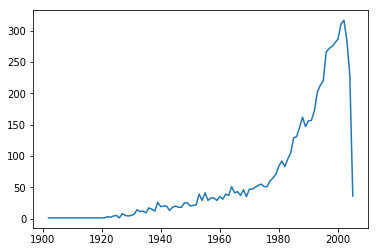

In [80]:
%matplotlib inline
# create the plot here
movies[mjv]['year'].value_counts().sort_index().plot()

### Task 2.10: Yearly average

Compute the average rating per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

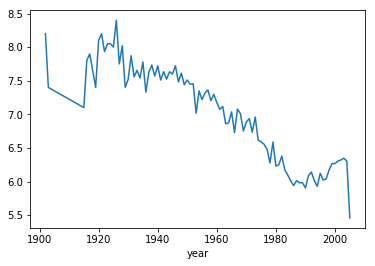

In [90]:
# your code goes here
movies[mjv][['year','rating']].set_index('year').groupby('year')['rating'].mean().plot()

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? Are there differences between the rating of major movies and all movies over time? Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

**TODO: your code and your interpretation**
yes, because the average trend decreases
all movies trend declined at first then recovered and plateau 

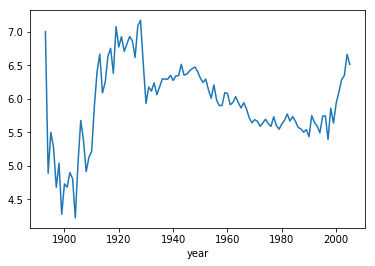

In [92]:
movies[['year','rating']].set_index('year').groupby('year')['rating'].mean().plot()

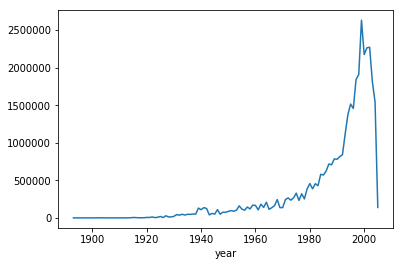

In [94]:
movies[['year','votes']].set_index('year').groupby('year')['votes'].sum().plot()